<a href="https://colab.research.google.com/github/MorozovDesu/neural_network_technologies/blob/main/%22%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B2%D1%8B%D0%B5_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8_1_%D0%9B%D0%B0%D0%B1%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
---
ВАРИАНТ РАБОТЫ имеет вид: ZPN, где

Z=1-6 – вид закона распределения генерируемых признаков

1.     Биномиальное

2.     Геометрическое

3.     Гипергеометрическое

4.     Пуассона

5.     Равномерное

6.     Нормальное

P=2,3 – число признаков

N=3,4,5 – число классов

ПОРЯДОК ВЫПОЛНЕНИЯ РАБОТЫ

1.     Сгенерировать случайные числа по указанному закону распределения. Из них создается матрица из M строк (наблюдений) и P столбцов (признаков). Сгенерированные строки должны принадлежать одному из N классов за счет прибавления к сгенерированным числам положительной или отрицательной добавки (функция)
2.     Все признаки   должны быть числовыми и нормализованными (находиться в диапазоне [0,1]). Дополнительно создается классификационный признак.

3.     Разделить данные варианта на  обучающую и тестирующую выборки.

4.     Персептрон. Так как персептрон способен делить объекты только на два класса, то организуем работу итерационно:

        4.1.  Создать персептрон для отделения 1 класса от всех остальных. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 1 класса.

        4.2.  Создать персептрон для отделения 2 класса от оставшихся. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 2 класса

        4.3.  Продолжить, пока не будут разделены все объекты

        4.4.  Построить графики разделяющей поверхности и визуальное представление результатов тестирования

5.     Сеть Кохонена (Kohonen). Вероятностная нейронная сеть (PNN).  Сеть с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Осуществить кластеризацию с помощью конкурирующей сети (слой Кохонена), а затем классификацию с помощью двух трехслойных сетей: вероятностной нейронной сети (PNN) и сети с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Для каждого вида сети выполнить следующие этапы:

     5.1 Создание сети

     5.2 Обучение сети на обучающей выборке

     5.3 Протестировать сеть отдельно по обучающей и по тестирующей выборке

     5.4 Построить визуальное представление результатов тестирования

     5.5 Оценить качество классификации в виде матриц

     5.6 Выдать число итераций обучения

6.     Оформить результаты в виде таблицы


In [34]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from sklearn.datasets import make_blobs

In [35]:
# Указываем параметры
# Z = 1  Выбираем гипергеометричское распределение
P = 2  # Число признаков
N = 5  # Число классов

count = 0
M = 200  # Число наблюдений
data = []
cluster_spacing = 25  # Расстояние между кластерами
ngood = np.random.randint(70, 100)
nbad = 100 - ngood
nsample = np.random.randint(1, 100)
for i in range(5):
    c = np.random.hypergeometric(ngood=ngood, nbad=nbad, nsample=nsample, size=(M, P)) + count
    count += cluster_spacing  # Увеличиваем расстояние между кластерами
    data.append(c)

# Собираем признаки из всех классов
x = np.concatenate([c[:, 0] for c in data])  # Признаки по оси X
y = np.concatenate([c[:, 1] for c in data])  # Признаки по оси Y
xy = [[x[i], y[i]] for i in range(len(x))]

# Создаем список Y, присваивая каждому классу уникальное значение
Y = []
for i in range(5):
    Y.extend([i] * M)
# Преобразуем список Y в массив numpy
Y = np.array(Y)

# Создаем DataFrame
res_df = pd.DataFrame(xy)
# Создаем двумерный рассеянный график
# plt.scatter(x, y, c=Y)
# # Показываем график
# plt.show()
# print(Y)
# Создаем DataFrame с добавленными значениями кластера
df = pd.DataFrame({'X': x, 'Y': y, 'Cluster': Y})

# Создаем график без аннотаций
fig = px.scatter(df, x='X', y='Y', color='Cluster', labels={'X': 'Feature 0', 'Y': 'Feature 1', 'Cluster': 'Cluster'})
fig.update_traces(marker=dict(size=6))

# Отображаем график
fig.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 1))
scaler.fit(res_df)
standart_df = scaler.transform(res_df)
print(type(standart_df))
print(standart_df)

<class 'numpy.ndarray'>
[[0.03809524 0.03846154]
 [0.03809524 0.02884615]
 [0.03809524 0.03846154]
 ...
 [0.98095238 0.98076923]
 [0.97142857 0.99038462]
 [1.         0.99038462]]


In [37]:
# Импортируем класс KMeans из библиотеки scikit-learn для кластеризации данных.
from sklearn.cluster import KMeans
# Создаем объект KMeans с параметрами:
# - n_clusters=5 указывает, что мы хотим разделить данные на 5 кластера.
# - random_state=0 используется для установки начального состояния генератора случайных чисел и обеспечения воспроизводимости результатов.
kmeans = KMeans(n_clusters=5,n_init=10, random_state=0)
# Обучаем модель K-Means на стандартизированных данных `standart_df`.
kmeans.fit(standart_df)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [38]:
# Создаем DataFrame `df_cluster_centers` для хранения координат центров кластеров.
df_cluster_centers = pd.DataFrame(kmeans.cluster_centers_)

# Выводим DataFrame `df_cluster_centers`, который содержит координаты центров кластеров.
print(df_cluster_centers)
print("----------------------------------------------------------------------------------")
print("матрица ошибок")
# Выводим матрицу ошибок, которая показывает, как точки данных распределены по кластерам
# и сравнивает это с истинными метками классов.
# `Y` содержит истинные метки классов, а `kmeans.labels_` содержит предсказанные метки кластеров.
confusion_mat = confusion_matrix(Y, kmeans.labels_)
print(confusion_mat)

          0         1
0  0.752429  0.750192
1  0.276524  0.267163
2  0.513190  0.508606
3  0.037667  0.028846
4  0.989762  0.991298
----------------------------------------------------------------------------------
матрица ошибок
[[  0   0   0 200   0]
 [  0 200   0   0   0]
 [  0   0 200   0   0]
 [200   0   0   0   0]
 [  0   0   0   0 200]]


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(standart_df, kmeans.labels_, test_size=0.3, random_state=42)

# X_train - обучающие признаки
# X_test - тестовые признаки
# y_train - метки обучающих данных
# y_test - метки тестовых данных

In [40]:
print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)
assert len(X_train) + len(X_test) == len(standart_df), "Выборки пересекаются или неправильно разделены."
print("----------------------------------------------------------------------------------")
print("Форма y_train:", y_train.shape)
print("Форма y_test:", y_test.shape)
assert len(y_train) + len(y_test) == len(standart_df), "Выборки пересекаются или неправильно разделены."
print("----------------------------------------------------------------------------------")
# Вывести первые несколько объектов данных (первые 5, например)
print("Первые 5 объектов X_train:")
print(X_train[:5])

print("Первые 5 объектов y_train:")
print(y_train[:10])

print("Первые 5 объектов X_test:")
print(X_test[:5])

print("Первые 5 объектов y_test:")
print(y_test[:5])

Форма X_train: (700, 2)
Форма X_test: (300, 2)
----------------------------------------------------------------------------------
Форма y_train: (700,)
Форма y_test: (300,)
----------------------------------------------------------------------------------
Первые 5 объектов X_train:
[[0.5047619  0.50961538]
 [0.5047619  0.50961538]
 [0.5047619  0.49038462]
 [0.52380952 0.50961538]
 [0.75238095 0.75      ]]
Первые 5 объектов y_train:
[2 2 2 2 0 4 1 2 4 2]
Первые 5 объектов X_test:
[[0.52380952 0.50961538]
 [0.75238095 0.74038462]
 [0.75238095 0.75961538]
 [0.75238095 0.75      ]
 [0.52380952 0.51923077]]
Первые 5 объектов y_test:
[2 0 0 0 2]


# Персептрон

In [41]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) #
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias # тут ошибка
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    #функция активации
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

In [42]:
# Создайте экземпляр класса Perceptron
perceptron = Perceptron(learning_rate=0.05, n_iters=1000)

# Обучите персептрон на обучающих данных
perceptron.fit(X_train, y_train)

# Выполните предсказания на трансформированных данных X_test
predictions = perceptron.predict(X_test)

# Определите процент правильно классифицированных объектов
correct_classifications = np.sum(predictions == y_test)
total_objects = len(y_test)
accuracy = correct_classifications / total_objects * 100

print(f"Процент правильно классифицированных объектов: {accuracy}%")

Процент правильно классифицированных объектов: 23.666666666666668%


In [43]:
#отделяем первый класс от других в обучающей выборке
y_train1 = [[] for _ in range(len(y_train))]#создаем массив для отделения из Y_train 1 класса
for _ in range(len(y_train)):
    if y_train[_] == 3:
        y_train1[_] = 1
    else:
        y_train1[_] = 0
Y_train1 = np.array(y_train1)
Y_train1 = Y_train1.reshape((len(y_train), 1))

#отделяем первый класс от других  в тестирующей выборке
Y_test1 = [[] for _ in range(len(y_test))]#создаем массив для отделения из Y_train 1 класса
for _ in range(len(y_test)):
    if y_test[_] == 3:
        Y_test1[_] = 1
    else:
        Y_test1[_] = 0
y_test1 = np.array(Y_test1)
y_test1 = y_test1.reshape((len(y_test), 1))

dfff = pd.DataFrame(X_train)

# Создаем DataFrame с обучающими данными
dfff = pd.DataFrame({'Feature 0': X_train[:, 0], 'Feature 1': X_train[:, 1], 'Cluster': Y_train1.flatten()})

# Создаем график с кластерами и метками
fig = go.Figure(data=[
    go.Scatter(
        x=dfff['Feature 0'],
        y=dfff['Feature 1'],
        mode='markers',
        marker=dict(size=6, color=Y_train1.flatten()),  # Цвет по кластерам
        text=Y_train1.flatten()  # Метки для отображения при наведении
    )
])

fig.update_layout(xaxis_title='Feature 0', yaxis_title='Feature 1')
fig.show()

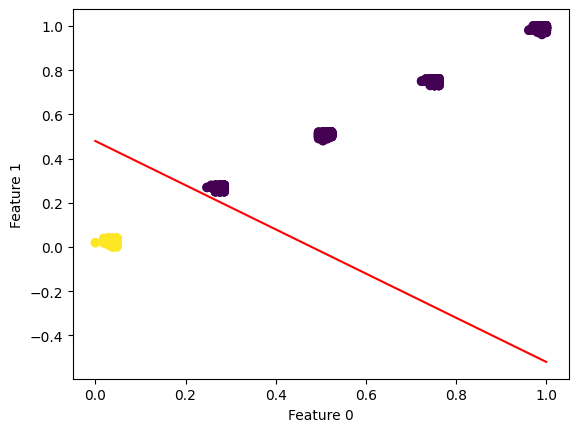

[[555   0]
 [  0 145]]


In [44]:
per = Perceptron(n_iters=1000)

per.fit(X_train, y_train1)
perTrain1 = per.predict(X_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = np.amin(X_train[:, 1])
x1_2 = np.amax(X_train[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train[:, 0], X_train[:, 1], c=perTrain1, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train1, perTrain1)
print(distinctions)


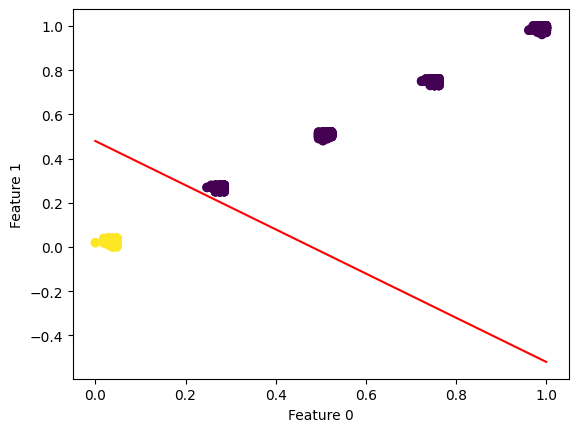

[[245   0]
 [  0  55]]


In [45]:
perTest = per.predict(X_test)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = np.amin(X_train[:, 1])
x1_2 = np.amax(X_train[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train[:, 0], X_train[:, 1], c=perTrain1, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_test1, perTest)
print(distinctions)

#убираем 1й класс из обучающей выборки

In [46]:
# Убираем класс 1 из обучающей выборки
class_to_remove = 1
indices_to_remove_train = np.where(y_train == class_to_remove)[0]
y_train2 = np.delete(y_train, indices_to_remove_train, axis=0)
X_train2 = np.delete(X_train, indices_to_remove_train, axis=0)

# Печатаем количество элементов после удаления
print(len(y_train2))
print(len(X_train2))

# Преобразуем класс 2 в класс 1 (если необходимо)
for i in range(len(y_train2)):
    if y_train2[i] == 2:
        y_train2[i] = 1
    else:
        y_train2[i] = 0

# Убираем класс 1 из тестовой выборки (аналогично)
indices_to_remove_test = np.where(y_test == class_to_remove)[0]
y_test2 = np.delete(y_test, indices_to_remove_test, axis=0)
X_test2 = np.delete(X_test, indices_to_remove_test, axis=0)

# Преобразуем класс 2 в класс 1 (если необходимо)
for i in range(len(y_test2)):
    if y_test2[i] == 2:
        y_test2[i] = 1
    else:
        y_test2[i] = 0

571
571


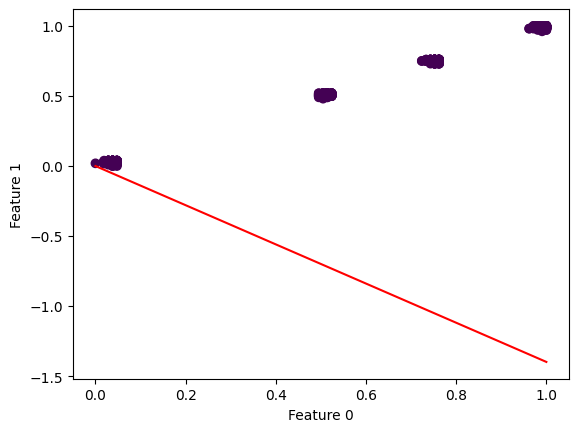

[[428   0]
 [143   0]]


In [47]:
per2 = Perceptron(n_iters=1000)

per2.fit(X_train2, y_train2)
perTrain2 = per2.predict(X_train2)

x0_1 = np.amin(X_train2[:, 0])
x0_2 = np.amax(X_train2[:, 0])

x1_1 = np.amin(X_train2[:, 1])
x1_2 = np.amax(X_train2[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per2.weights[0] / per2.weights[1]
intercept = -per2.bias / per2.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=perTrain2, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train2, perTrain2)
print(distinctions)


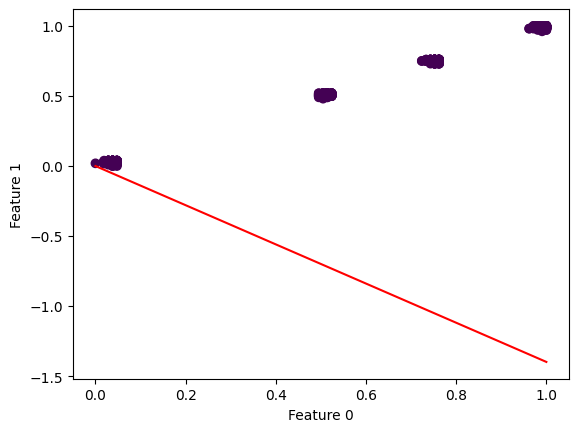

[[172   0]
 [ 57   0]]


In [48]:
perTest2 = per2.predict(X_test2)

x0_1 = np.amin(X_train2[:, 0])
x0_2 = np.amax(X_train2[:, 0])

x1_1 = np.amin(X_train2[:, 1])
x1_2 = np.amax(X_train2[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per2.weights[0] / per2.weights[1]
intercept = -per2.bias / per2.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=perTrain2, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_test2, perTest2)
print(distinctions)

#Убираем 2й класс из обучающей выборки

In [49]:
# Убираем 2 класс из обучающей выборки
indices_to_remove = np.where((y_train == 0) | (y_train == 1))
X_train3 = np.delete(X_train, indices_to_remove, axis=0)
y_train3 = np.delete(y_train, indices_to_remove, axis=0)
print(len(y_train3))
print(len(X_train3))

# Преобразуем класс 2 в класс 1 (если необходимо)
for i in range(len(y_train3)):
    if y_train3[i] == 2:
        y_train3[i] = 1
    else:
        y_train3[i] = 0

# Убираем 2 класс из тестовой выборки (аналогично)
indices_to_remove = np.where((y_test == 0) | (y_test == 1))
X_test3 = np.delete(X_test, indices_to_remove, axis=0)
y_test3 = np.delete(y_test, indices_to_remove, axis=0)

# Преобразуем класс 2 в класс 1 (если необходимо)
for i in range(len(y_test3)):
    if y_test3[i] == 2:
        y_test3[i] = 1
    else:
        y_test3[i] = 0

print(len(y_train3))
print(len(X_train3))


424
424
424
424


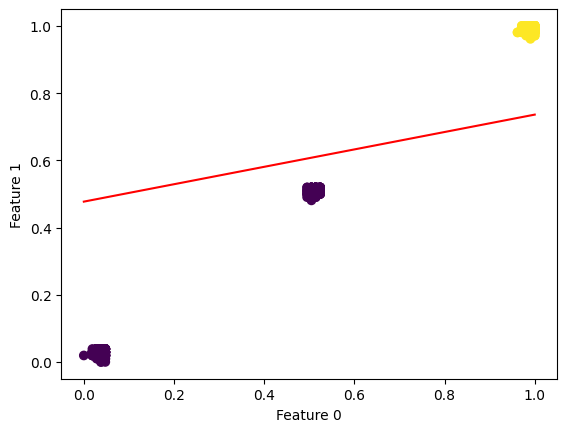

[[145 136]
 [143   0]]


In [50]:
per3 = Perceptron(n_iters=1000)

per3.fit(X_train3, y_train3)
perTrain3 = per3.predict(X_train3)

x0_1 = np.amin(X_train3[:, 0])
x0_2 = np.amax(X_train3[:, 0])

x1_1 = np.amin(X_train3[:, 1])
x1_2 = np.amax(X_train3[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per3.weights[0] / per3.weights[1]
intercept = -per3.bias / per3.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=perTrain3, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train3, perTrain3)
print(distinctions)


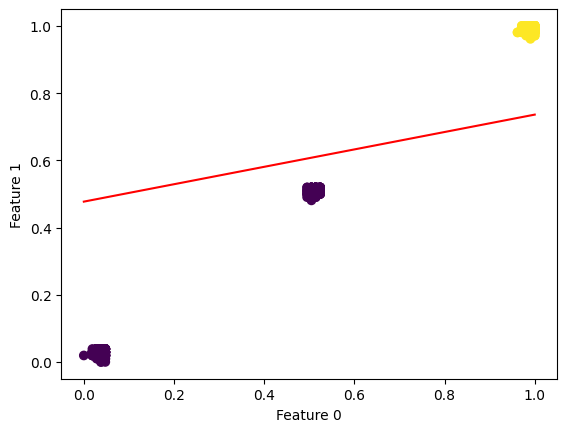

[[55 64]
 [57  0]]


In [51]:
perTest3 = per3.predict(X_test3)

x0_1 = np.amin(X_train3[:, 0])
x0_2 = np.amax(X_train3[:, 0])

x1_1 = np.amin(X_train3[:, 1])
x1_2 = np.amax(X_train3[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per3.weights[0] / per3.weights[1]
intercept = -per3.bias / per3.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=perTrain3, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_test3, perTest3)
print(distinctions)

#Убираем 3й класс из обучающей выборки

In [52]:
#Убираем 3 класс из обучающей выборки
indices_to_remove = np.where((y_train == 2)|(y_train == 0) | (y_train == 1))
X_train4 = np.delete(X_train, indices_to_remove, axis=0)
y_train4 = np.delete(y_train, indices_to_remove, axis=0)
print(len(y_train4))
print(len(X_train4))
print(y_train4)
for _ in range(len(y_train4)):
    if y_train4[_] == 3:
        y_train4[_] = 1
    else:
        y_train4[_] = 0

#убираем 2 класс из тестовой выборки
indices_to_remove = np.where((y_test == 0) | (y_test == 1))
X_test4 = np.delete(X_test, indices_to_remove, axis=0)
y_test4 = np.delete(y_test, indices_to_remove, axis=0)

print(len(y_train4))
print(len(X_train4))

for _ in range(len(y_test4)):
    if y_test4[_] == 3:
        y_test4[_] = 1
    else:
        y_test4[_] = 0
print(y_train4)

281
281
[4 4 3 3 3 3 4 3 3 4 3 4 3 4 3 3 3 3 3 3 3 4 3 3 3 3 3 4 4 3 4 3 4 3 3 3 3
 4 3 4 3 4 4 4 3 3 3 3 3 4 4 3 4 3 4 3 3 4 3 3 3 4 3 4 4 4 3 3 3 3 3 4 3 3
 4 4 3 4 4 4 3 3 4 3 4 4 3 3 4 3 3 3 3 4 4 3 3 3 4 4 3 3 4 4 4 3 3 3 4 3 3
 4 4 3 3 4 4 3 3 3 4 3 3 3 4 4 3 4 3 4 3 3 3 4 4 4 4 3 4 4 3 4 4 4 4 3 4 4
 4 4 4 3 4 3 4 4 3 3 3 3 3 4 4 3 4 3 4 3 4 4 3 3 4 3 3 4 3 4 3 3 3 4 4 4 4
 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 4 4 4 4 3 4 4 3 4 3 4
 3 3 4 3 3 4 3 3 3 4 4 4 3 4 3 3 3 3 3 4 4 4 4 3 4 3 3 4 4 3 3 3 4 3 3 4 4
 4 4 4 4 3 3 4 3 3 4 3 4 3 4 3 3 3 3 3 3 4 3]
281
281
[0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1
 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0

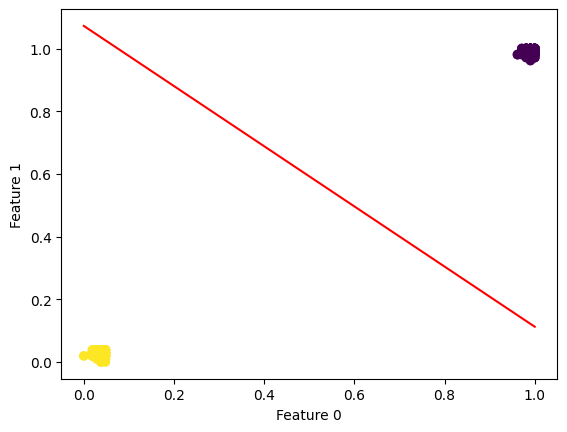

[[136   0]
 [  0 145]]


In [53]:
per4 = Perceptron(n_iters=1000)

per4.fit(X_train4, y_train4)
perTrain4 = per4.predict(X_train4)

x0_1 = np.amin(X_train4[:, 0])
x0_2 = np.amax(X_train4[:, 0])

x1_1 = np.amin(X_train4[:, 1])
x1_2 = np.amax(X_train4[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per4.weights[0] / per4.weights[1]
intercept = -per4.bias / per4.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train4[:, 0], X_train4[:, 1], c=perTrain4, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train4, perTrain4)
print(distinctions)

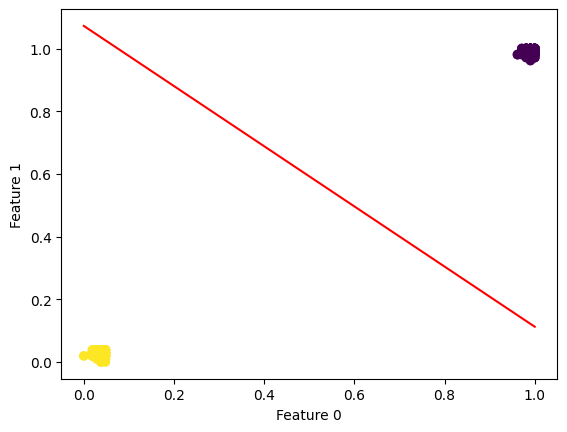

[[64 57]
 [ 0 55]]


In [54]:
perTest4 = per4.predict(X_test4)

x0_1 = np.amin(X_train4[:, 0])
x0_2 = np.amax(X_train4[:, 0])

x1_1 = np.amin(X_train4[:, 1])
x1_2 = np.amax(X_train4[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per4.weights[0] / per4.weights[1]
intercept = -per4.bias / per4.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train4[:, 0], X_train4[:, 1], c=perTrain4, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_test4, perTest4)
print(distinctions)

# Построение сети Кохонена

In [68]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Определяем класс KohonenNet
# class KohonenNet():
#     def __init__(self, m=3, n=3, lr=1, sigma=1, max_iter=3000, weights=[]):
#         self.m = m  # количество классов
#         self.n = n  # количество уровней сети
#         self.shape = (m, n)
#         self.initial_lr = lr
#         self.lr = lr  # скорость обучения
#         self.sigma = sigma  # параметр изменения скорости обучения (она будет снижаться с каждой итерацией)
#         self.max_iter = max_iter
#         self.weights = weights

#     def _find_bmu(self, x):
#         x_stack = np.stack([x] * (self.m * self.n), axis=0)
#         distance = np.linalg.norm(x_stack - self.weights, axis=1)
#         return np.argmin(distance)

#     def step(self, x):
#         x_stack = np.stack([x] * (self.m * self.n), axis=0)
#         bmu_index = self._find_bmu(x)
#         self.weights[bmu_index] += self.lr * (x - self.weights[bmu_index])

#     def fit(self, X, epochs=1, shuffle=True):
#         global_iter_counter = 0
#         n_samples = X.shape[0]
#         total_iterations = np.minimum(epochs * n_samples, self.max_iter)

#         for epoch in range(epochs):
#             if global_iter_counter > self.max_iter:
#                 break

#             if shuffle:
#                 indices = np.random.permutation(n_samples)
#             else:
#                 indices = np.arange(n_samples)

#             for idx in indices:
#                 if global_iter_counter > self.max_iter:
#                     break
#                 input = X[idx]
#                 self.step(input)
#                 global_iter_counter += 1
#                 self.lr = (1 - (global_iter_counter / total_iterations)) * self.initial_lr

#         self._n_iter_ = global_iter_counter

#     def returnChangedWeights(self):
#         return self.weights

#     def predict(self, X):
#         labels = np.array([self._find_bmu(x) for x in X])
#         return labels

#--------------------------------------------------------------------------------

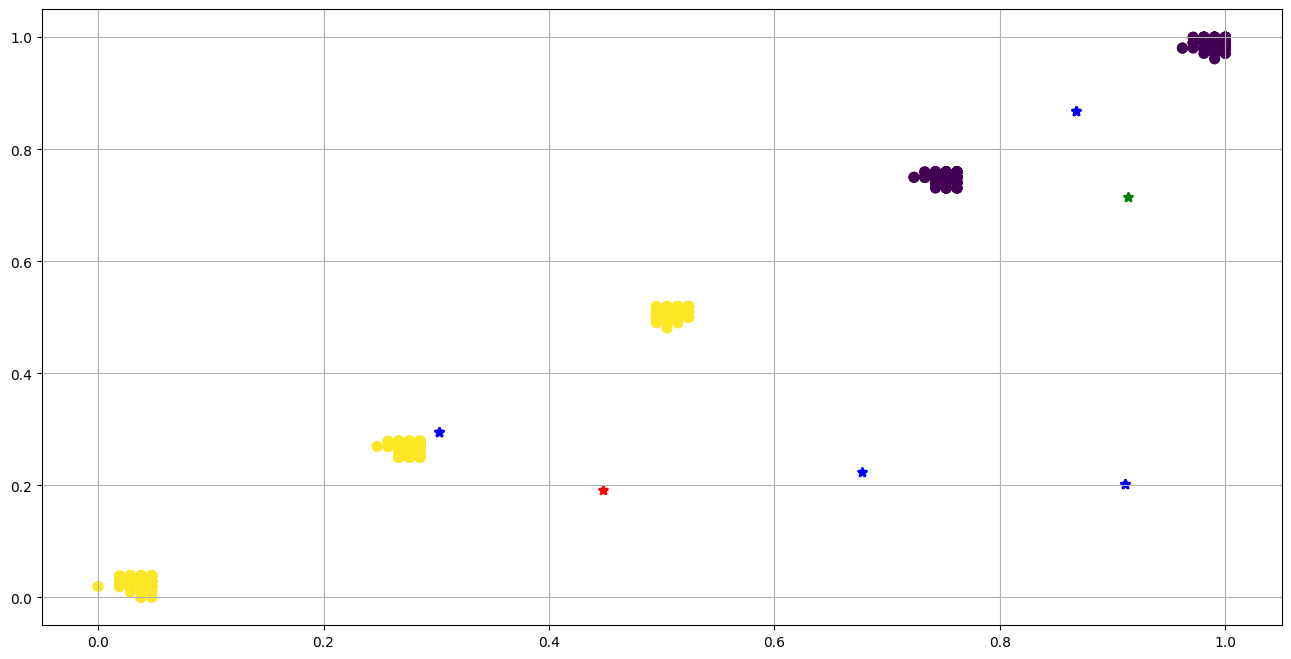

[2 2 2 2 0 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0
 2 0 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2
 2 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 0 0 2 2 2 2 0 0 0 2 2 2 2
 0 0 2 0 0 0 0 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 0 0 2 2 0 2
 0 0 2 0 2 2 2 0 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 0 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 0 0 0 2 2 0 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 0
 0 2 2 2 0 2 0 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 0 2 0 2 2 2 2 0 2 0 0 2 2 2
 2 2 0 0 0 2 2 0 2 2 0 2 2 0 2 2 0 2 2 2 0 2 2 0 0 0 2 2 0 2 2 2 0 0 0 0 2
 2 0 2 0 2 2 2 2 0 0 2 2 0 0 2 2 0 0 0 0 0 2 0 2 0 2 0 2 2 2 2 0 0 2 0 2 2
 0 0 2 2 0 2 0 2 2 2 0 2 2 0 0 0 0 2 0 0 2 0 0 2 0 2 0 2 0 0 0 2 2 0 2 2 2
 0 2 0 0 2 2 2 2 0 2 0 0 0 2 0 2 2 0 2 2 0 2 0 0 0 2 0 2 2 2 0 0 0 2 0 2 2
 2 0 0 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 2 0 0 0 0
 2 0 0 0 0 0 0 0 0 2 0 2 2 0 2 2 2 0 2 0 0 0 2 0 0 2 0 0 2 0 2 0 0 2 2 0 0
 0 2 2 2 2 0 0 2 2 2 0 0 

In [65]:
# Определяем класс KohonenNet
class KohonenNet():
    def __init__(self, m=5, n=1, lr=0.1, sigma=1, max_iter=3000, weights=None):
        self.m = m  # количество классов
        self.n = n  # количество уровней сети
        self.shape = (m, n)
        self.initial_lr = lr
        self.lr = lr  # скорость обучения
        self.sigma = sigma  # параметр изменения скорости обучения (она будет снижаться с каждой итерацией)
        self.max_iter = max_iter
        if weights is not None:
            self.weights = weights
        else:
            self.weights = np.random.rand(m * n, 2)  # Начальные веса задаются случайно в пространстве входных данных

    def _find_bmu(self, x):
        x_stack = np.stack([x] * (self.m * self.n), axis=0)
        distance = np.linalg.norm(x_stack - self.weights, axis=1)
        return np.argmin(distance)

    def step(self, x):
        x_stack = np.stack([x] * (self.m * self.n), axis=0)
        bmu_index = self._find_bmu(x)
        self.weights[bmu_index] += self.lr * (x - self.weights[bmu_index])

    def fit(self, X, epochs=1, shuffle=True):
        global_iter_counter = 0
        n_samples = X.shape[0]
        total_iterations = np.minimum(epochs * n_samples, self.max_iter)

        for epoch in range(epochs):
            if global_iter_counter > self.max_iter:
                break

            if shuffle:
                indices = np.random.permutation(n_samples)
            else:
                indices = np.arange(n_samples)

            for idx in indices:
                if global_iter_counter > self.max_iter:
                    break
                input = X[idx]
                self.step(input)
                global_iter_counter += 1
                self.lr = (1 - (global_iter_counter / total_iterations)) * self.initial_lr

        self._n_iter_ = global_iter_counter

    def returnChangedWeights(self):
        return self.weights.reshape((self.m, self.n, 2))

    def predict(self, X):
        labels = np.array([self._find_bmu(x) for x in X])
        return labels

# Генерация начальных случайных весов
trainMax = np.amax(X_train)
trainMin = np.amin(X_train)
weights = np.random.uniform(trainMin, trainMax, (3, 2))

# Создание фигуры
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()

# Построение начальных весов
ax.scatter(weights[0, 0], weights[0, 1], marker='*', linewidths=2, c="GREEN")
ax.scatter(weights[1, 0], weights[1, 1], marker='*', linewidths=2, c="RED")
ax.scatter(weights[2, 0], weights[2, 1], marker='*', linewidths=2, c="BLUE")

# Создание экземпляра KohonenNet
kohonen = KohonenNet(m=3, n=1, lr=0.1)

# Обучение сети Кохонена
kohonen.fit(X_train, shuffle=True)
predTrain = kohonen.predict(X_train)

# Построение точек обучающих данных
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', linewidths=2, c=predTrain)
ax.grid()

# Построение обновленных весов
weights = kohonen.returnChangedWeights()
ax.scatter(weights[:, 0, 0], weights[:, 0, 1], marker='*', linewidths=2, c="GREEN")
# Обратите внимание, что здесь мы используем индекс 0, так как у нас всего один уровень
ax.scatter(weights[:, 0, 0], weights[:, 0, 1], marker='*', linewidths=2, c="RED")
ax.scatter(weights[:, 0, 0], weights[:, 0, 1], marker='*', linewidths=2, c="BLUE")

# Отображение графика
plt.show()
print(predTrain)


In [66]:
# Добавление кода для изменения формы массива predTrain
predTrain = predTrain.reshape((len(predTrain), 1))
print(confusion_matrix(y_train, predTrain))

[[147   0   0   0   0]
 [  0   0 129   0   0]
 [  0   0 143   0   0]
 [  0   0 145   0   0]
 [136   0   0   0   0]]


IndexError: ignored

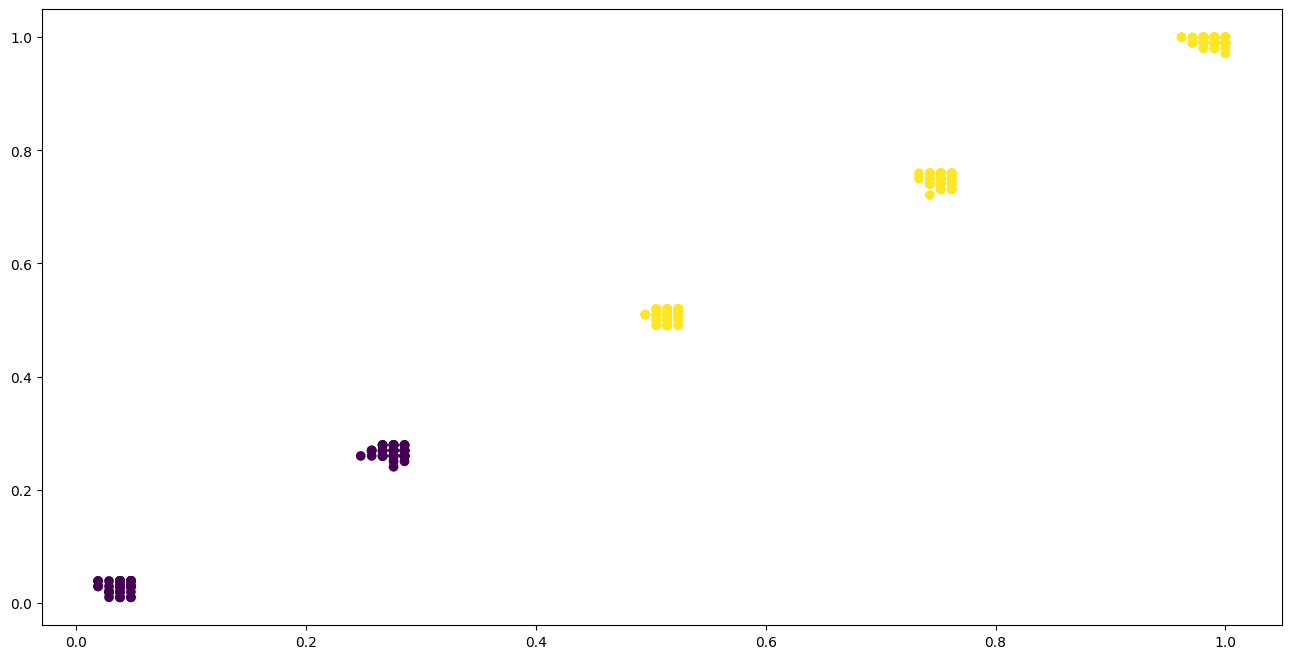

In [67]:
# Создайте список цветов для каждого класса
colors = ["GREEN", "RED", "BLUE"]

# Получите обновленные веса из сети Кохонена
updated_weights = kohonen.returnChangedWeights()

# Создайте фигуру и оси
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()

# Отобразите точки тестовых данных и цвета в соответствии с предсказаниями
ax.scatter(X_test[:, 0], X_test[:, 1], marker='o', linewidths=1, c=predTest)

# Отобразите обновленные веса для каждого класса с соответствующим цветом
for class_idx, color in enumerate(colors):
    ax.scatter(updated_weights[class_idx, 0], updated_weights[class_idx, 1], marker='*', linewidths=2, c=color)

# Включите сетку
ax.grid()

# Покажите график
plt.show()


[[  0   0 147   0   0]
 [  0 129   0   0   0]
 [  0   0 143   0   0]
 [  0 145   0   0   0]
 [  0   0 136   0   0]]
